In [2]:
!pip install deepface

Defaulting to user installation because normal site-packages is not writeable


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from deepface import DeepFace

2024-05-22 19:35:00.648959: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-22 19:35:00.687706: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-22 19:35:00.688642: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-22 19:35:01.483321: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [11]:
# Function to visualize the reconstruction of the images - each row contains the original image, and the reconstructed image, also warped image if available
def visualize_reconstruction(original_images, reconstructed_images, warped_images=None, n = None):
    if n is None:
        n = len(reconstructed_images)
    for i in range(n):
        if warped_images is not None:
            fig, ax = plt.subplots(1, 3)
            ax[0].imshow(original_images[i])
            ax[1].imshow(warped_images[i])
            ax[2].imshow(reconstructed_images[i])
        else:
            fig, ax = plt.subplots(1, 2)
            ax[0].imshow(original_images[i])
            ax[1].imshow(reconstructed_images[i])


def reconstruction_accuracy(original_images, reconstructed_images, metric='cosine', model='ArcFace', generate_plot=False):
    distances = []
    threshold = 0
    for i in range(len(reconstructed_images)):
        res = DeepFace.verify(original_images[i], reconstructed_images[i], model_name=model, distance_metric=metric, enforce_detection=False)
        if i == 0:
            threshold = res['threshold']
        distances.append(res['distance'])
    
    distances = np.array(distances)
    accuracy = np.mean(distances < threshold)
    print('Accuracy: ', accuracy)

    if generate_plot:
        import seaborn as sns
        sns.kdeplot(distances)
        plt.axvline(x=threshold, color='r', linestyle='--')
        plt.xlabel('{} Distance'.format(metric))
        plt.ylabel('Density')
        


#### Evaluation in case of Warping Method

In [5]:
param1 = "20_9_0"
param2 = "train"
model_output = np.load('ffhq256/warped_data/{}_{}.npz'.format(param1, param2))

warped_images = model_output['arr_2']
reconstructed_images = model_output['arr_0']

# if original images not available in warped_data, load them from the preprocessed original dataset on which the model was trained
if os.path.exists('warped_dataset/{}/{}/original_images/'.format(param1, param2)):
    original_image_data = "warped_dataset/{}/{}/original_images/".format(param1, param2)
    original_image_files = os.listdir(original_image_data)
    original_image_files.sort()

    original_images = []
    for file in original_image_files:
        original_image = cv2.imread(os.path.join(original_image_data, file))
        original_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)
        original_images.append(original_image)
else:
    warped_image_data = "warped_dataset/{}/{}/images/".format(param1, param2)
    original_image_data = "datasets/ffhq256_pp/{}/images/".format(param2)
    warped_image_files = os.listdir(warped_image_data)
    warped_image_files.sort()

    original_images = []
    for file in warped_image_files:
        original_image = cv2.imread(os.path.join(original_image_data, file))
        original_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)
        original_images.append(original_image)
        

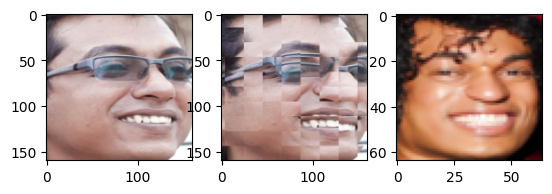

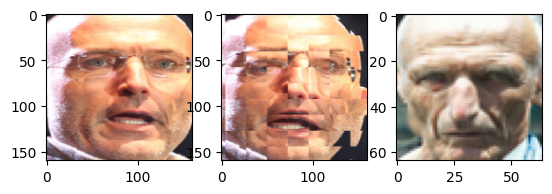

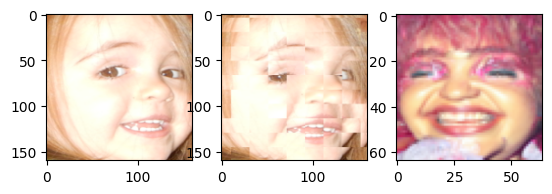

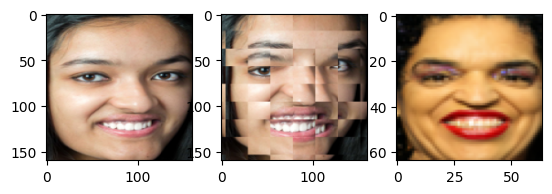

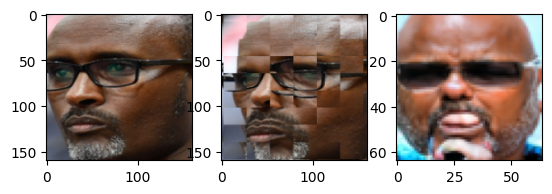

In [9]:
# Visualize the reconstruction
visualize_reconstruction(original_images, reconstructed_images, warped_images, n=5)

Accuracy:  0.5897435897435898


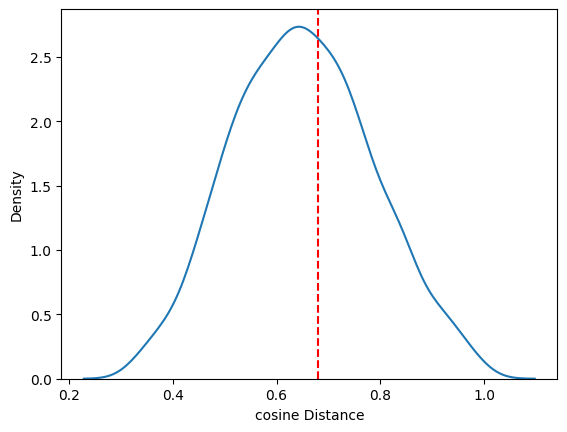

In [12]:
# Calculate the accuracy of the reconstruction
reconstruction_accuracy(original_images, reconstructed_images, metric='cosine', model='ArcFace', generate_plot=True)